SCRIPT NECESSITA DE MEMÓRIA PRA SER PROCESSADO NORMALMENTE, PROCESSO LENTO

In [1]:
import xarray as xr # Import the Xarray package
import matplotlib.pyplot as plt # Plotting library
import numpy as np # Import the Numpy package
import cartopy,cartopy.crs as ccrs # Plot maps
import cartopy.feature as cfeature # Collection of points, lines and polygons
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER # Add gridlines and tick labels to a map
import cartopy.io.shapereader as shpreader # Oriented shapefile reader
from netCDF4 import Dataset # Read/Write NetCDF4 files
from datetime import datetime, timedelta # Basics Dates and time types
from matplotlib import cm # Colormap handling utilities
import metpy
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from utilities import loadCPT
from scipy.ndimage.filters import maximum_filter, minimum_filter
import scipy.ndimage as ndimage
from ecmwf.opendata import Client

In [36]:
def plot_maxmin_points_0(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    
    from scipy.ndimage.filters import maximum_filter, minimum_filter

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):

        txt2 = ax.annotate('\n' + str(int(data[mxy[i], mxx[i]])), xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]),
                           xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), 
                color=color, size=14, clip_on=True, annotation_clip=True, fontweight='bold', 
                           horizontalalignment='center', verticalalignment='top',
                transform=ccrs.PlateCarree())  

In [4]:
ds13=xr.open_dataset('C:/Users/igorr/Downloads/OR_ABI-L2-RRQPEF-M6_G16_s20233071210207_e20233071219515_c20233071220005.nc')
ds13

<xarray.Dataset>
Dimensions:                                 (y: 5424, x: 5424, number_of_time_bounds: 2, number_of_image_bounds: 2, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_lat_bounds: 2, number_of_rainfall_rate_bounds: 2)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1518 ... -0.1518
  * x                                       (x) float32 -0.1518 ... 0.1518
    y_image                                 float32 ...
    x_image                                 float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    solar_zenith_angle                      float32 ...
    latitude                                float32 ...
    accounted_rainfall_rate                 float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, number_of_LZA_bounds, number_of_SZA_bounds, number_of_lat_bounds, number_of_rainfall_rate_bounds
Data variables: (12/28)
    RRQPE                                   (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 ...
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    quantitative_local_zenith_angle_bounds  (number_of_LZA_bounds) float32 ...
    solar_zenith_angle_bounds               (number_of_SZA_bounds) float32 ...
    latitude_bounds                         (number_of_lat_bounds) float32 ...
    accounted_rainfall_rate_bounds          (number_of_rainfall_rate_bounds) float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-11-03T12:10:20.7Z
    time_coverage_end:         2023-11-03T12:19:51.5Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        538a9868-c664-4f64-8443-b8645bcbc695

In [5]:
dat13 = ds13.metpy.parse_cf('RRQPE')
#dat13=dat13
geos = dat13.metpy.cartopy_crs

x = dat13.x
y = dat13.y

In [6]:
# Scan's start time, converted to datetime object
scan_start = datetime.strptime(ds13.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')
date=scan_start
# Scan's end time, converted to datetime object
scan_end = datetime.strptime(ds13.time_coverage_end, '%Y-%m-%dT%H:%M:%S.%fZ')

# File creation time, convert to datetime object
file_created = datetime.strptime(ds13.date_created, '%Y-%m-%dT%H:%M:%S.%fZ')

# The 't' variable is the scan's midpoint time
midpoint = str(ds13['t'].data)[:-8]
scan_mid = datetime.strptime(midpoint, '%Y-%m-%dT%H:%M:%S.%f')

print('Scan Start    : {}'.format(scan_start))
print('Scan midpoint : {}'.format(scan_mid))
print('Scan End      : {}'.format(scan_end))
print('File Created  : {}'.format(file_created))
print('Scan Duration : {:.2f} minutes'.format((scan_end-scan_start).seconds/60))

Scan Start    : 2023-11-03 12:10:20.700000
Scan midpoint : 2023-11-03 12:15:06.100000
Scan End      : 2023-11-03 12:19:51.500000
File Created  : 2023-11-03 12:20:00.500000
Scan Duration : 9.50 minutes


In [15]:
cores=['#ffffff','#ececec','#e0e0e0','#c0ffc0','#a6eca6','#80c8a2','#60a0a0','#2060c8','#4880c8','#68a4c8','#80d8e0','#a0f4ff',
       '#d8ffff','#e0def4','#d8acf0','#c460c8','#a00010','#c00008','#d80004','#ff0000','#ff8000','#ffb000','#ffd400','#ffec00',
       '#ffffa0','#ffffec']
my_cmap = ListedColormap(cores, name="my_cmap")
levels=[0,1,3,5,10,20,30,40,50,60,70,80,90,100,110,120,130,150,170,200,230,260,300,340,380,430,500]

In [19]:
# xx,yy=np.meshgrid(dat13.x,dat13.y)

Text(1.0, 1.0, '12:10UTC 03/Nov/2023')

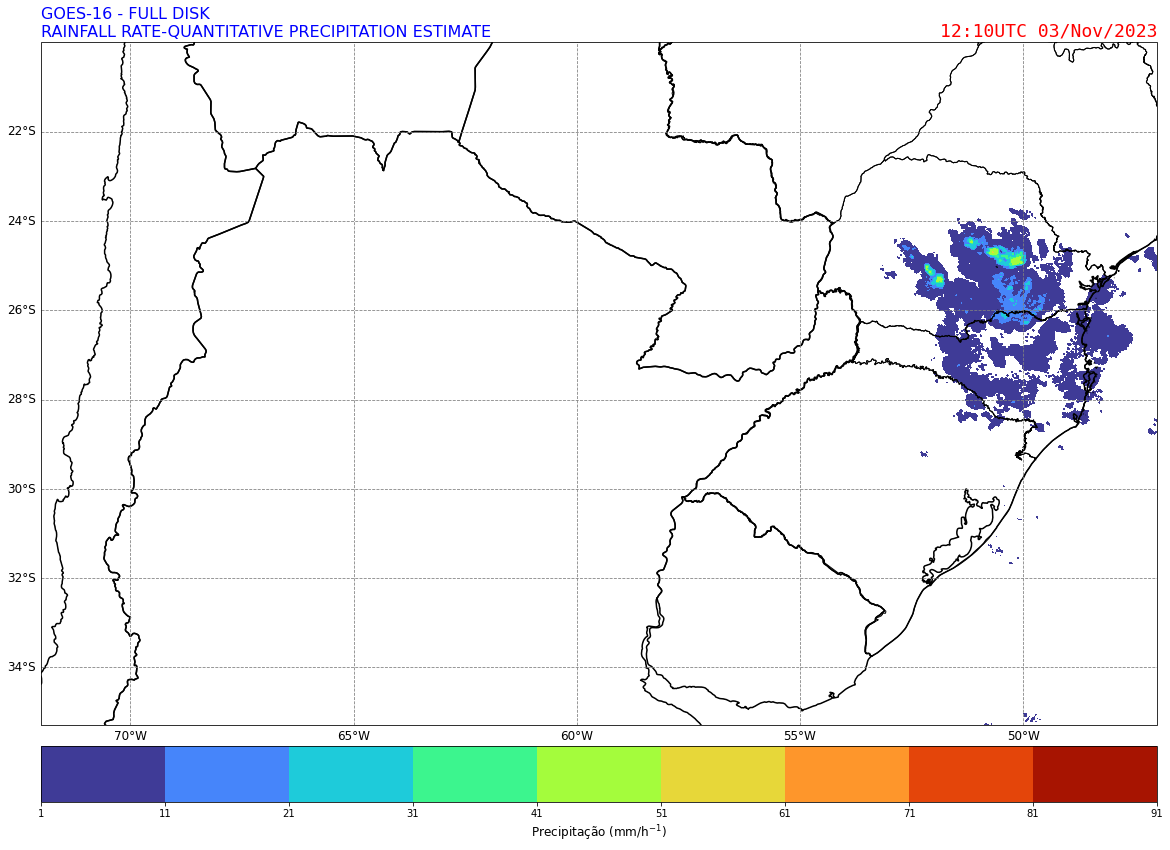

In [17]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution="10m",edgecolor='k',linestyle='-',linewidth=0.3)
#ax.set_extent([-83,-34,12,-54]) #América do Sul
#ax.set_extent([-58,-47,-34,-22]) #Sul do Brasil
#ax.set_extent([-54.8,-47.9,-22.4,-26.8]) #Paraná
ax.set_extent([-72,-47,-20,-35])

im=ax.contourf(x,y,dat13,np.arange(1,100,10),
               cmap='turbo',
               #levels=levels,
               #cmap=my_cmap,
               origin='upper',
               extent=(x.min(), x.max(), y.min(), y.max()),
               transform=geos)

states = list(shpreader.Reader
              ('C:/Users/igorr/OneDrive/Área de Trabalho/MAPAS/10/ne_10m_admin_0_countries.shp').geometries())
ax.add_geometries(states, ccrs.PlateCarree(), edgecolor='k',facecolor='none',linestyle='-',linewidth=1.5)
states = list(shpreader.Reader
              ('C:/Users/igorr/OneDrive/Área de Trabalho/MAPAS/BR/BR_UF_2022.shp').geometries())
ax.add_geometries(states, ccrs.PlateCarree(), edgecolor='k',facecolor='none',linestyle='-',linewidth=1.)

g1=ax.gridlines(crs=ccrs.PlateCarree(),linestyle='--',color='gray',draw_labels=True)
g1.right_labels=False
g1.top_labels=False
g1.yformatter=LATITUDE_FORMATTER
g1.xformatter=LONGITUDE_FORMATTER
g1.ylabel_style={'size':12,'color':'black'}
g1.xlabel_style={'size':12,'color':'black'}
cbar=plt.colorbar(im,ax=ax,pad=0.02,fraction=0.06,orientation='horizontal')
cbar.set_label(label='Precipitação (mm/h$^{-1}$)',size=12)

plt.title('GOES-16 - FULL DISK\nRAINFALL RATE-QUANTITATIVE PRECIPITATION ESTIMATE',
          fontsize=16,loc='left',color='blue')

plt.title('{}'.format(scan_start.strftime('%H:%MUTC %d/%b/%Y')),fontsize=18,loc='right',
          color='red',fontweight='normal',fontfamily='monospace')
#plt.savefig('GOES16_PREC_AS_'+scan_start.strftime('%H_%MUTC_%d_%b_%Y')+'.jpeg',dpi=300,bbox_inches='tight')